In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
# evaluate knn on the sonar dataset with k-means ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
import time
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

In [31]:
heart = pd.read_csv('dataset/heart.csv')
#heart = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')
#saturation = pd.read_csv ('dataset/o2Saturation.csv')

In [32]:
heart.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [33]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### data description
- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - target : 0= less chance of heart attack 1= more chance of heart attack

In [34]:
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### data Preprocessing 

In [35]:
dataset = heart
dataset.drop_duplicates(inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
297   57    0   0     140   241    0        1       123     1      0.2    1   
298   45    1   3     110   264    0        1       132     0      1.2    1   
299   68    1   0     144   193    1        1       141     0      3.4    1   
300   57    1   0     130   131    0        1       115     1      1.2    1   
301   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
297    0      3       0  
298    0      3       0  
299    2      3       0  
300    1      3       0  
301    1      2       0  

[302 rows x 14 columns]

In [36]:
categorical_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']

numerical_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

In [37]:
dataset

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
297   57    0   0     140   241    0        1       123     1      0.2    1   
298   45    1   3     110   264    0        1       132     0      1.2    1   
299   68    1   0     144   193    1        1       141     0      3.4    1   
300   57    1   0     130   131    0        1       115     1      1.2    1   
301   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
297    0      3       0  
298    0      3       0  
299    2      3       0  
300    1      3       0  
301    1      2       0  

[302 rows x 14 columns]

In [38]:
#Standerdize
def standardise(X):
    scaler = StandardScaler()
    scaler.fit(X)
    scaled_features = scaler.transform(X) # centering and scaling
    return(scaled_features)

In [39]:
# finding optimal value of k
def hyper_tune(X,y):
    #Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=101
                                                   )
    
    
    error_rate = []
    for i in range(1,40):

         knn = KNeighborsClassifier(n_neighbors=i)
         knn.fit(X_train,y_train)
         pred_i = knn.predict(X_test)
         error_rate.append(np.mean(pred_i != y_test))

    plt.figure(figsize=(10,6))
    plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)) + 1)
    return(error_rate.index(min(error_rate)) + 1)


## Train the KNN Classifier
## Compute average accuracy precision, recall and AUC 30 times

In [40]:
def calculate_model(k,X,y):
    
    recall_list_10 = []
    precision_list_10 = []
    specificity_10 = []
    f1_list_10 = []
    accuracy_10 = []
    cpu_10 = []
    roc_10 = []

    kfold = KFold(n_splits=10, shuffle=True)
    for i in range(30):
        recall_list = []
        precision_list = []
        specificity = []
        f1_list = []
        accuracy = []
        cpu = []
        roc_list = []
        



        for train_ix, test_ix in kfold.split(X, y):




            X_train , X_test = X[train_ix],X[test_ix]
            y_train , y_test = y[train_ix] , y[test_ix]
            t0= time.time()
            model = KNeighborsClassifier(n_neighbors = k)

            model.fit(X_train,y_train)
            predictions = model.predict(X_test)
            probs = model.predict_proba(X_test)
            probs = probs[:, 1]
            t1 = time.time() - t0
                        #print("Time elapsed: ", t1) # CPU seconds elapsed (floating point)
            cm = confusion_matrix(y_test,predictions)
            f1_list.append(f1_score(y_test, predictions, average="weighted")*100)

            recall_list.append(recall_score(y_test, predictions, average="weighted")*100)
            precision_list.append(precision_score(y_test, predictions, average="weighted")*100)
            specificity1 = cm[1,1]/(cm[0,1]+cm[1,1])
            if not np.isnan(specificity1):
                specificity.append( (cm[1,1]/(cm[0,1]+cm[1,1]))*100)
            accuracy.append(accuracy_score(y_test, predictions)*100)
            roc_list.append(roc_auc_score(y_test, probs)*100)
            cpu.append(t1)

        precision_list_10.append(sum(precision_list)/10)
        specificity_10.append(sum(specificity)/len(specificity))
        f1_list_10.append(sum(f1_list)/10)
        accuracy_10.append(sum(accuracy)/10)
        recall_list_10.append(sum(recall_list)/10)
        roc_10.append(sum(roc_list)/10)
        cpu_10.append(sum(cpu)/10)

    
    plt.figure(figsize=(10,6))
    plt.plot(range(0,30),accuracy_10,color='blue', linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title('checking the variance in 30 iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.show()
   
    accu = sum(accuracy_10)/30
    pre = sum(precision_list_10)/30
    spec = sum(specificity_10)/30
    rec =  sum(recall_list_10)/30
    f1 =  sum(f1_list_10)/30
    roc = sum(roc_10)/30
    cpu = sum(cpu_10)/30
    return([accu,pre,spec,rec,f1,roc,cpu])


In [41]:
dict_knn = {}

## Std model 

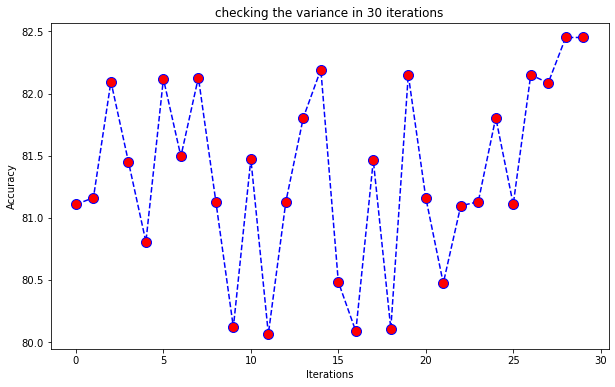

{'Std_scalar': [81.34946236559139,
  82.26573864529331,
  81.05239456943052,
  81.34946236559139,
  81.2326213467041,
  87.6273688325031,
  0.0037255986531575525]}

In [42]:

#X = dataset.iloc[:, 0:-1]

#y = dataset.iloc[:, -1]
y = dataset.output.values
X = dataset.drop(['output'], axis = 1)
scaled_features = standardise(X)

k= 5
X=scaled_features
result = calculate_model(k,X,y)
dict_knn['Std_scalar'] = result
dict_knn


## Std Scalar + optimal value model

Minimum error:- 0.13114754098360656 at K = 24


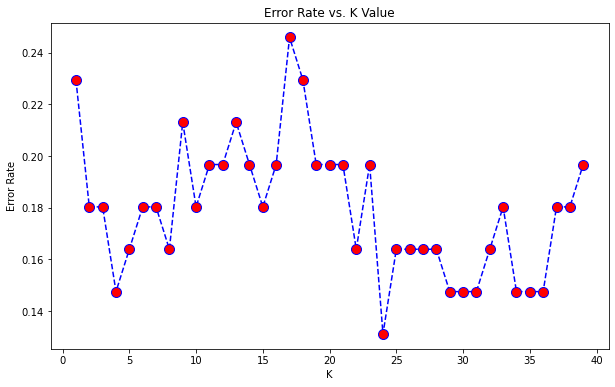

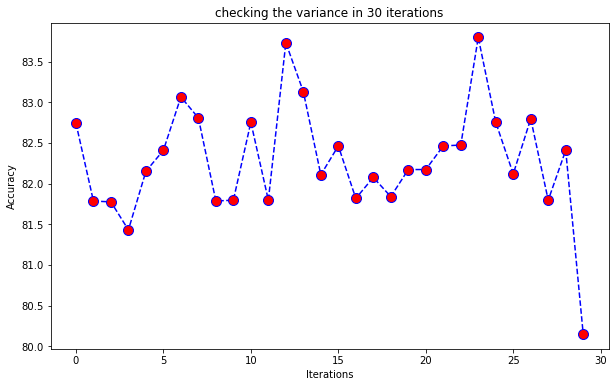

In [43]:
X = dataset.iloc[:, 0:-1]
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)
#Train-test split

X= scaled_features                                                 
k= hyper_tune(X,y)

result = calculate_model(k,X,y)
dict_knn['Optimal_k'] = result



In [44]:
dict_knn

{'Std_scalar': [81.34946236559139,
  82.26573864529331,
  81.05239456943052,
  81.34946236559139,
  81.2326213467041,
  87.6273688325031,
  0.0037255986531575525],
 'Optimal_k': [82.28494623655914,
  84.04552309810808,
  78.8980321864263,
  82.28494623655914,
  81.96531826884792,
  90.27358515458364,
  0.003460120360056559]}

## Sequential Forward Search/Backward search

In [45]:
X = dataset.iloc[:, 0:-1].values
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.2, random_state=101
                                                   )
# Sequential Forward Selection
knn = KNeighborsClassifier()
sfs = SFS(knn, 
          k_features= 8, 
          forward=True, 
          floating=False, 
          scoring='accuracy',

          n_jobs=-1)
sfs = sfs.fit(X_train, y_train)

print('\nSequential Forward Selection :')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)



Sequential Forward Selection :
(2, 4, 5, 8, 9, 10, 11, 12)
CV Score:
0.842517006802721


[2, 4, 5, 8, 9, 10, 11, 12]
Minimum error:- 0.14754098360655737 at K = 8


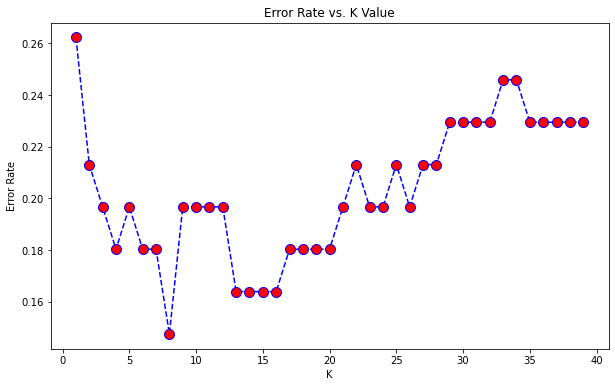

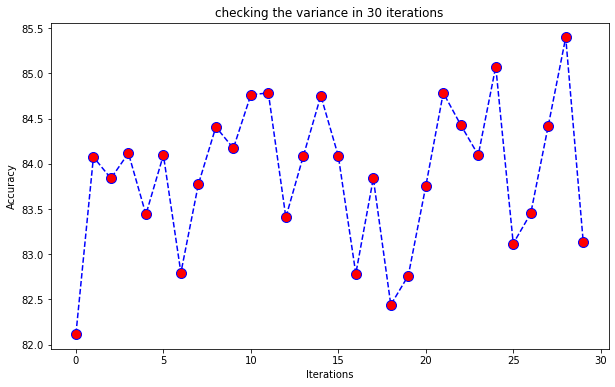

[83.87383512544801,
 84.90548437098833,
 86.44270523364952,
 83.87383512544801,
 83.92214060022573,
 88.95625150463933,
 0.002817342281341553]

In [46]:
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)


X= standardise(X)
X = X[:,feat_cols]
k= hyper_tune(X,y)

result = calculate_model(k,X,y)
dict_knn['SFS'] = result
result

In [81]:
X = dataset.iloc[:, 0:-1].values
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.2, random_state=101
                                                   )
# Sequential Forward Selection
knn = KNeighborsClassifier()
sfs = SFS(knn, 
          k_features= 8, 
          forward=False, 
          floating=False, 
          scoring='accuracy',

          n_jobs=-1)
sfs = sfs.fit(X_train, y_train)

print('\nSequential Forward Selection :')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)



Sequential Forward Selection :
(0, 1, 2, 6, 7, 8, 10, 11)
CV Score:
0.8340986394557823


[0, 1, 2, 6, 7, 8, 10, 11]
Minimum error:- 0.13114754098360656 at K = 3


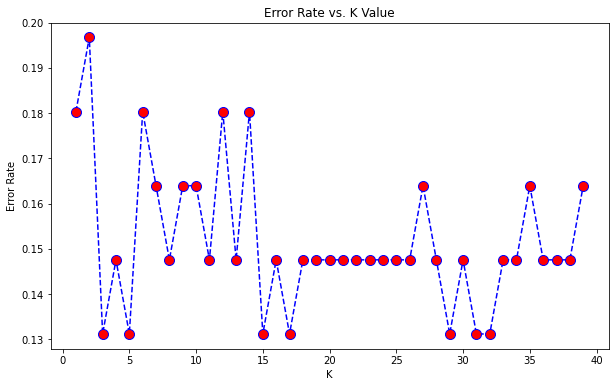

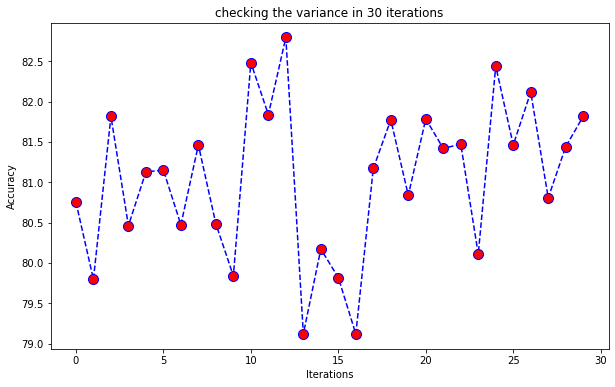

In [82]:
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)


X= standardise(X)
X = X[:,feat_cols]
k= hyper_tune(X,y)

result = calculate_model(k,X,y)
dict_knn['SBS'] = result


## Mutual info

In [49]:
X = dataset.iloc[:, 0:-1]
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.2, random_state=101
                                                   )
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)
#Mutual Inormation

cp          0.159632
thall       0.151261
oldpeak     0.094730
caa         0.073621
exng        0.068233
slp         0.060969
chol        0.058264
thalachh    0.047249
sex         0.029219
age         0.012844
restecg     0.009166
trtbps      0.008434
fbs         0.000000
dtype: float64

Minimum error:- 0.16393442622950818 at K = 14


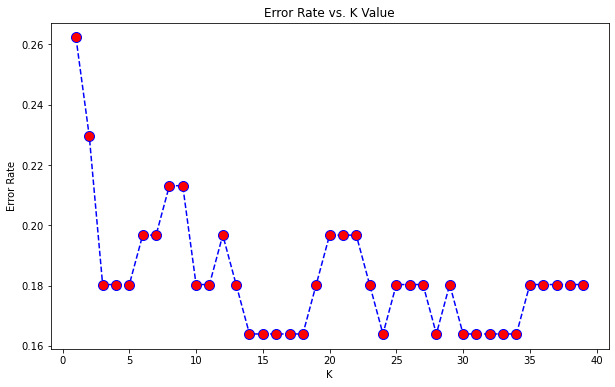

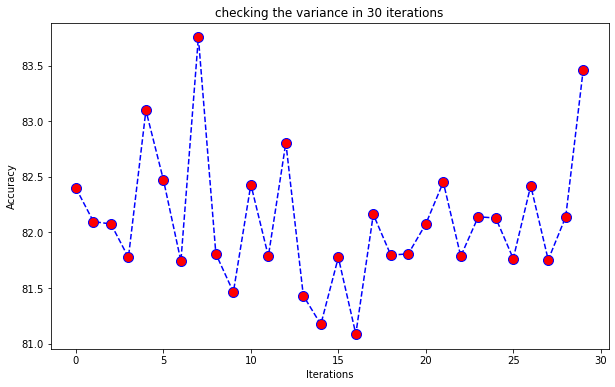

In [50]:

X = dataset[['slp','thall','exng','cp','chol','caa','thalachh']].values
y = dataset.iloc[:, -1].values

X= standardise(X)                      
k= hyper_tune(X,y)


result = calculate_model(k,X,y)
dict_knn['MI'] = result


In [51]:
dict_knn

{'Std_scalar': [81.34946236559139,
  82.26573864529331,
  81.05239456943052,
  81.34946236559139,
  81.2326213467041,
  87.6273688325031,
  0.0037255986531575525],
 'Optimal_k': [82.28494623655914,
  84.04552309810808,
  78.8980321864263,
  82.28494623655914,
  81.96531826884792,
  90.27358515458364,
  0.003460120360056559],
 'SFS': [83.87383512544801,
  84.90548437098833,
  86.44270523364952,
  83.87383512544801,
  83.92214060022573,
  88.95625150463933,
  0.002817342281341553],
 'SBS': [81.16021505376345,
  82.35486023393223,
  81.86190915351133,
  81.16021505376345,
  81.15175549175432,
  86.09587601497697,
  0.00302055279413859],
 'MI': [82.10143369175628,
  83.04654065328032,
  81.56541189749564,
  82.10143369175628,
  81.99900893678574,
  88.21428391428793,
  0.003121275901794433]}

## Chi square 

In [52]:
from sklearn.feature_selection import chi2
X = dataset.iloc[:, 0:-1]
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=101
                                                   )


f_p_values=chi2(X_train,y_train)
f_p_values
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X.columns
p_values

p_values.sort_values(ascending=True)

thalachh    5.218768e-30
oldpeak     1.412583e-14
cp          1.455762e-13
caa         3.601265e-12
exng        2.623108e-08
age         3.546344e-04
chol        2.217908e-03
slp         4.726054e-03
thall       2.128567e-02
trtbps      3.271097e-02
sex         3.422409e-02
restecg     2.387720e-01
fbs         7.325843e-01
dtype: float64

Minimum error:- 0.14754098360655737 at K = 11


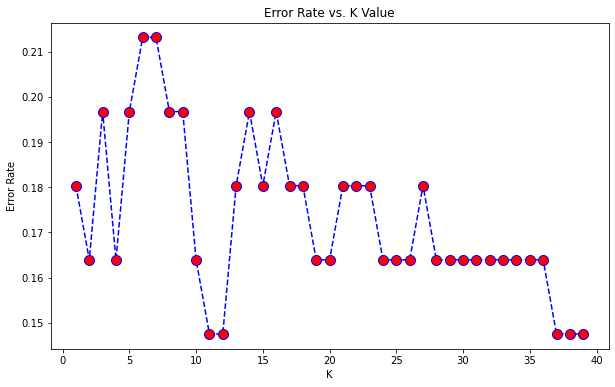

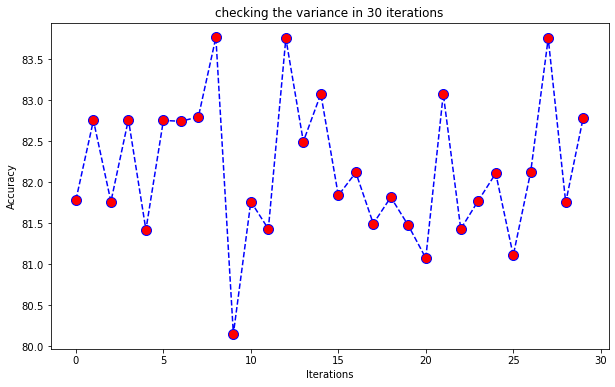

In [53]:

X = dataset[['caa','slp','thalachh','thall','oldpeak','exng','cp','chol','trtbps','age','sex']].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)
X = scaled_features
k= hyper_tune(X,y)

result = calculate_model(k,X,y)
result
dict_knn['Chi'] = result

In [54]:
#del dict_knn['Chi']
dict_knn

{'Std_scalar': [81.34946236559139,
  82.26573864529331,
  81.05239456943052,
  81.34946236559139,
  81.2326213467041,
  87.6273688325031,
  0.0037255986531575525],
 'Optimal_k': [82.28494623655914,
  84.04552309810808,
  78.8980321864263,
  82.28494623655914,
  81.96531826884792,
  90.27358515458364,
  0.003460120360056559],
 'SFS': [83.87383512544801,
  84.90548437098833,
  86.44270523364952,
  83.87383512544801,
  83.92214060022573,
  88.95625150463933,
  0.002817342281341553],
 'SBS': [81.16021505376345,
  82.35486023393223,
  81.86190915351133,
  81.16021505376345,
  81.15175549175432,
  86.09587601497697,
  0.00302055279413859],
 'MI': [82.10143369175628,
  83.04654065328032,
  81.56541189749564,
  82.10143369175628,
  81.99900893678574,
  88.21428391428793,
  0.003121275901794433],
 'Chi': [82.16451612903226,
  83.27655614905078,
  81.32560900042562,
  82.16451612903226,
  82.0371849234133,
  89.68743237874995,
  0.0029538687070210777]}

### EFS 

In [55]:
#pip install --upgrade pip mlxtend  

Features: 8190/8190

Best accuracy score: 0.86
Best subset (indices): (1, 2, 5, 8, 10, 11, 12)
Best subset (corresponding names): ('1', '2', '5', '8', '10', '11', '12')
Minimum error:- 0.13114754098360656 at K = 20
20


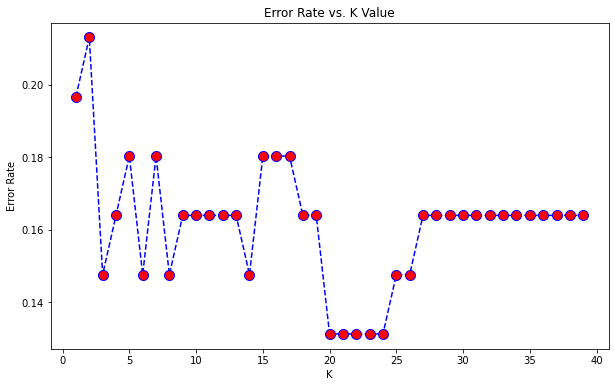

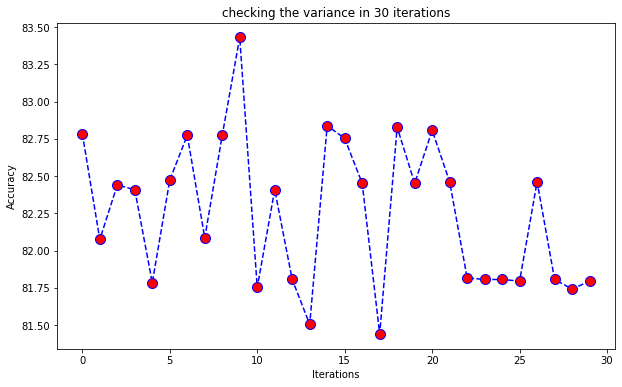

In [56]:
# Import logistic regression from Scikit-learn
# Import ExhaustiveFeatureSelector from Mlxtend
X = dataset.iloc[:, 0:-1].values
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.2, random_state=101)
knn = KNeighborsClassifier()

# Create an EFS object
efs = EFS(estimator=knn,        # Use logistic regression as the classifier/estimator
          min_features=1,      # The minimum number of features to consider is 1
          max_features=12,      # The maximum number of features to consider is 4
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy 
          cv=5)                # The number of cross-validations to perform is 5

# Train EFS with our dataset
efs = efs.fit(scaled_features, y)

# Print the results
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names 

feat_cols = list( efs.best_idx_)
feat_cols
#X_train = X_train[:, feat_cols]
#X_test = X_test[:, feat_cols]

X= standardise(X)
X = X[:,feat_cols]
k= hyper_tune(X,y)
print(k)

result = calculate_model(k,X,y)
dict_knn['EFS'] = result

In [57]:
dict_knn

{'Std_scalar': [81.34946236559139,
  82.26573864529331,
  81.05239456943052,
  81.34946236559139,
  81.2326213467041,
  87.6273688325031,
  0.0037255986531575525],
 'Optimal_k': [82.28494623655914,
  84.04552309810808,
  78.8980321864263,
  82.28494623655914,
  81.96531826884792,
  90.27358515458364,
  0.003460120360056559],
 'SFS': [83.87383512544801,
  84.90548437098833,
  86.44270523364952,
  83.87383512544801,
  83.92214060022573,
  88.95625150463933,
  0.002817342281341553],
 'SBS': [81.16021505376345,
  82.35486023393223,
  81.86190915351133,
  81.16021505376345,
  81.15175549175432,
  86.09587601497697,
  0.00302055279413859],
 'MI': [82.10143369175628,
  83.04654065328032,
  81.56541189749564,
  82.10143369175628,
  81.99900893678574,
  88.21428391428793,
  0.003121275901794433],
 'Chi': [82.16451612903226,
  83.27655614905078,
  81.32560900042562,
  82.16451612903226,
  82.0371849234133,
  89.68743237874995,
  0.0029538687070210777],
 'EFS': [82.25232974910395,
  83.3661228383

### discritizer 

In [58]:
categorical_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']

numerical_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

In [59]:
from sklearn.preprocessing import KBinsDiscretizer
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
#trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
#trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data = trans.fit_transform(dataset[numerical_cols])
# convert the array back to a dataframe
num_cols = pd.DataFrame(data, dtype = 'int')
#num_cols = pd.DataFrame(data)
num_cols

0  1  2  3  4
0    7  4  2  6  3
1    1  3  2  8  5
2    2  3  1  7  2
3    5  2  2  8  1
4    5  2  5  7  0
..  .. .. .. .. ..
297  5  4  2  3  0
298  3  1  3  4  1
299  8  4  1  5  5
300  5  3  0  3  1
301  5  3  2  7  0

[302 rows x 5 columns]

In [60]:
num_cols.rename(columns = {0:'age', 1:'trtbps',2:'chol',3:'thalachh',4:'oldpeak'}, inplace = True)

In [61]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       302 non-null    int32
 1   trtbps    302 non-null    int32
 2   chol      302 non-null    int32
 3   thalachh  302 non-null    int32
 4   oldpeak   302 non-null    int32
dtypes: int32(5)
memory usage: 6.0 KB


In [62]:
df_add = dataset[categorical_cols].add(num_cols,fill_value=0)
df_add = pd.DataFrame(df_add, dtype = int)
df_add


age  caa  chol  cp  exng  fbs  oldpeak  restecg  sex  slp  thalachh  \
0      7    0     2   3     0    1        3        0    1    0         6   
1      1    0     2   2     0    0        5        1    1    0         8   
2      2    0     1   1     0    0        2        0    0    2         7   
3      5    0     2   1     0    0        1        1    1    2         8   
4      5    0     5   0     1    0        0        1    0    2         7   
..   ...  ...   ...  ..   ...  ...      ...      ...  ...  ...       ...   
297    5    0     2   0     1    0        0        1    0    1         3   
298    3    0     3   3     0    0        1        1    1    1         4   
299    8    2     1   0     0    1        5        1    1    1         5   
300    5    1     0   0     1    0        1        1    1    1         3   
301    5    1     2   1     0    0        0        0    0    1         7   

     thall  trtbps  
0        1       4  
1        2       3  
2        2       3  
3        2       2  
4        2       2  
..     ...     ...  
297      3       4  
298      3       1  
299      3       4  
300      3       3  
301      2       3  

[302 rows x 13 columns]

oldpeak     1.037818e-22
caa         1.341127e-11
cp          8.125199e-11
exng        1.022439e-05
thalachh    2.277983e-05
slp         9.434124e-03
age         1.340074e-02
thall       1.798765e-02
sex         2.788623e-02
trtbps      1.630069e-01
fbs         1.672147e-01
restecg     3.242724e-01
chol        6.151344e-01

Minimum error:- 0.13114754098360656 at K = 24


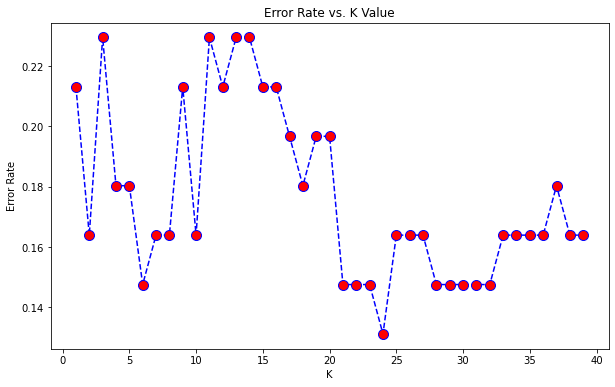

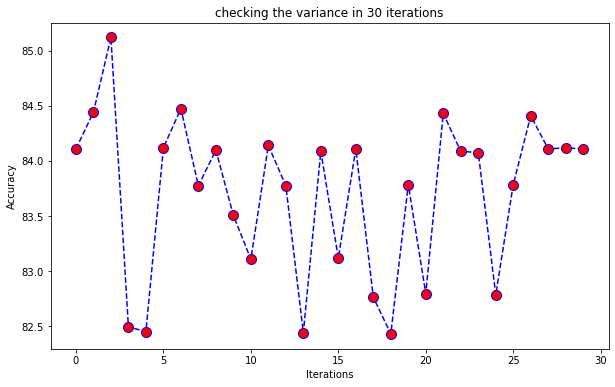

In [63]:
X = df_add.iloc[::].values
y = dataset.iloc[:, -1].values



X=standardise(X)                                         
k= hyper_tune(X,y)

result = calculate_model(k,X,y)
result
dict_knn['Disc'] = result

In [64]:
 dict_knn

{'Std_scalar': [81.34946236559139,
  82.26573864529331,
  81.05239456943052,
  81.34946236559139,
  81.2326213467041,
  87.6273688325031,
  0.0037255986531575525],
 'Optimal_k': [82.28494623655914,
  84.04552309810808,
  78.8980321864263,
  82.28494623655914,
  81.96531826884792,
  90.27358515458364,
  0.003460120360056559],
 'SFS': [83.87383512544801,
  84.90548437098833,
  86.44270523364952,
  83.87383512544801,
  83.92214060022573,
  88.95625150463933,
  0.002817342281341553],
 'SBS': [81.16021505376345,
  82.35486023393223,
  81.86190915351133,
  81.16021505376345,
  81.15175549175432,
  86.09587601497697,
  0.00302055279413859],
 'MI': [82.10143369175628,
  83.04654065328032,
  81.56541189749564,
  82.10143369175628,
  81.99900893678574,
  88.21428391428793,
  0.003121275901794433],
 'Chi': [82.16451612903226,
  83.27655614905078,
  81.32560900042562,
  82.16451612903226,
  82.0371849234133,
  89.68743237874995,
  0.0029538687070210777],
 'EFS': [82.25232974910395,
  83.3661228383

## Discritization(uniform) + Chi


In [65]:
X =  df_add
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

f_p_values=chi2(X_train,y_train)
f_p_values
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X.columns
p_values

p_values.sort_values(ascending=True)

oldpeak     5.307565e-25
cp          1.455762e-13
caa         3.601265e-12
exng        2.623108e-08
thalachh    9.030881e-06
slp         4.726054e-03
age         1.426404e-02
thall       2.128567e-02
sex         3.422409e-02
restecg     2.387720e-01
trtbps      2.541550e-01
chol        6.087285e-01
fbs         7.325843e-01
dtype: float64

Minimum error:- 0.08196721311475409 at K = 7


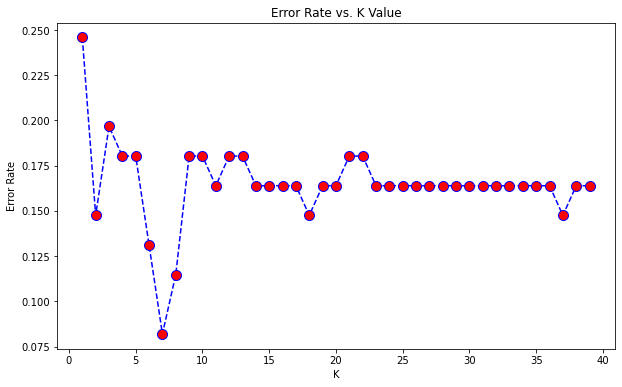

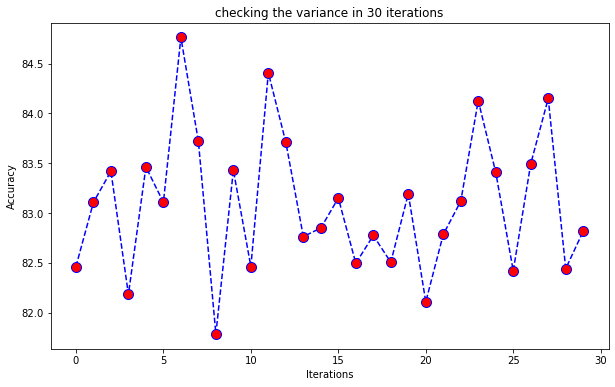

In [66]:

X = df_add[['caa','slp','thalachh','thall','oldpeak','exng','cp','age','sex']].values
y = dataset.iloc[:, -1].values
scaled_features = standardise(X)


X=scaled_features

k= hyper_tune(X,y)

result = calculate_model(k,X,y)
result
dict_knn['Disc_Uniform+Chi'] = result

In [67]:
 dict_knn

{'Std_scalar': [81.34946236559139,
  82.26573864529331,
  81.05239456943052,
  81.34946236559139,
  81.2326213467041,
  87.6273688325031,
  0.0037255986531575525],
 'Optimal_k': [82.28494623655914,
  84.04552309810808,
  78.8980321864263,
  82.28494623655914,
  81.96531826884792,
  90.27358515458364,
  0.003460120360056559],
 'SFS': [83.87383512544801,
  84.90548437098833,
  86.44270523364952,
  83.87383512544801,
  83.92214060022573,
  88.95625150463933,
  0.002817342281341553],
 'SBS': [81.16021505376345,
  82.35486023393223,
  81.86190915351133,
  81.16021505376345,
  81.15175549175432,
  86.09587601497697,
  0.00302055279413859],
 'MI': [82.10143369175628,
  83.04654065328032,
  81.56541189749564,
  82.10143369175628,
  81.99900893678574,
  88.21428391428793,
  0.003121275901794433],
 'Chi': [82.16451612903226,
  83.27655614905078,
  81.32560900042562,
  82.16451612903226,
  82.0371849234133,
  89.68743237874995,
  0.0029538687070210777],
 'EFS': [82.25232974910395,
  83.3661228383

## Discetization(k-mean) + chi

In [68]:
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
#trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
#trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data = trans.fit_transform(dataset[numerical_cols])
# convert the array back to a dataframe
num_cols = pd.DataFrame(data, dtype = 'int')
num_cols.rename(columns = {0:'age', 1:'trtbps',2:'chol',3:'thalachh',4:'oldpeak'}, inplace = True)
df_add = dataset[categorical_cols].add(num_cols,fill_value=0)
df_add = pd.DataFrame(df_add, dtype = int)
X = df_add
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

f_p_values=chi2(X_train,y_train)
f_p_values
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X.columns
p_values

p_values.sort_values(ascending=True)
 

oldpeak     2.265089e-22
cp          1.455762e-13
caa         3.601265e-12
exng        2.623108e-08
thalachh    3.946640e-06
slp         4.726054e-03
age         1.157160e-02
thall       2.128567e-02
sex         3.422409e-02
trtbps      2.329540e-01
restecg     2.387720e-01
chol        2.440536e-01
fbs         7.325843e-01
dtype: float64

Minimum error:- 0.14754098360655737 at K = 17


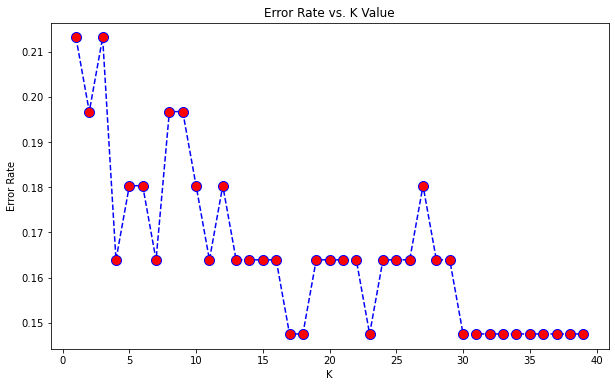

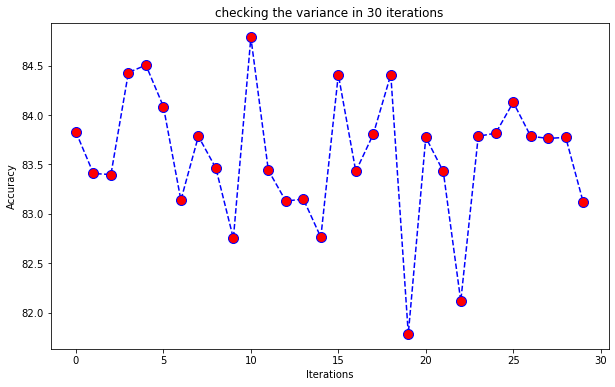

[83.5799283154122,
 85.06479235188274,
 80.90914947467344,
 83.5799283154122,
 83.38347478164673,
 89.7098511291695,
 0.0026843086878458656]

In [69]:
X = dataset [['caa','thalachh','slp','oldpeak','exng','cp','age','thall']].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=101
                                                   )
scaled_features = standardise(X)


X=scaled_features

k= hyper_tune(X,y)

result = calculate_model(k,X,y)
result
dict_knn['Disc_Kmeans+Chi'] = result
result

In [70]:
dict_knn

{'Std_scalar': [81.34946236559139,
  82.26573864529331,
  81.05239456943052,
  81.34946236559139,
  81.2326213467041,
  87.6273688325031,
  0.0037255986531575525],
 'Optimal_k': [82.28494623655914,
  84.04552309810808,
  78.8980321864263,
  82.28494623655914,
  81.96531826884792,
  90.27358515458364,
  0.003460120360056559],
 'SFS': [83.87383512544801,
  84.90548437098833,
  86.44270523364952,
  83.87383512544801,
  83.92214060022573,
  88.95625150463933,
  0.002817342281341553],
 'SBS': [81.16021505376345,
  82.35486023393223,
  81.86190915351133,
  81.16021505376345,
  81.15175549175432,
  86.09587601497697,
  0.00302055279413859],
 'MI': [82.10143369175628,
  83.04654065328032,
  81.56541189749564,
  82.10143369175628,
  81.99900893678574,
  88.21428391428793,
  0.003121275901794433],
 'Chi': [82.16451612903226,
  83.27655614905078,
  81.32560900042562,
  82.16451612903226,
  82.0371849234133,
  89.68743237874995,
  0.0029538687070210777],
 'EFS': [82.25232974910395,
  83.3661228383

## Feature Importance  coefficient based on SVM


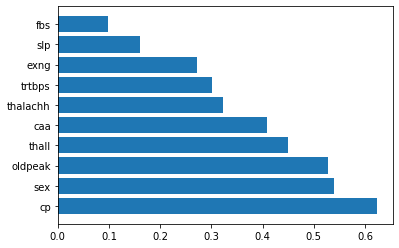

In [71]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()
    
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

features_names = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
f_importances(abs(svm.coef_[0]), features_names, top=10)


Minimum error:- 0.13114754098360656 at K = 10


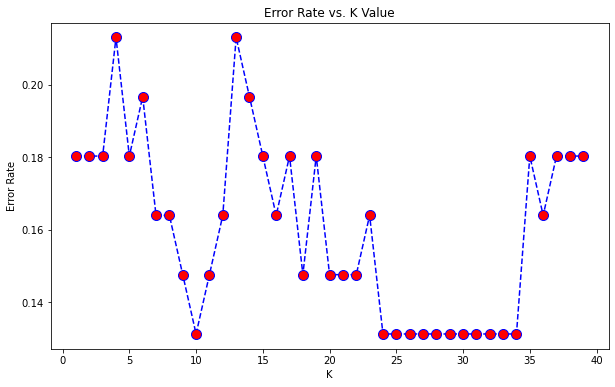

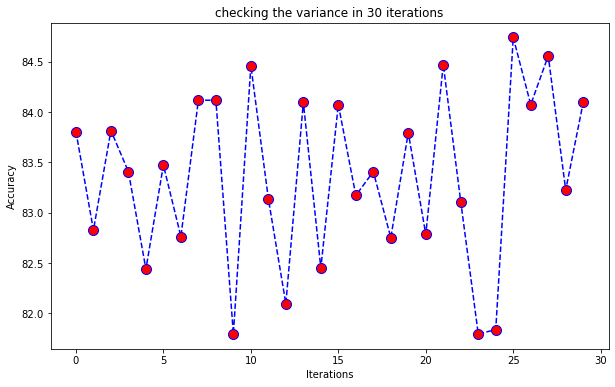

[83.35734767025089,
 84.46594599849368,
 82.10605710114258,
 83.35734767025089,
 83.1933128040477,
 89.31313678466513,
 0.0021170536677042645]

In [72]:
X = dataset[['cp','thall','oldpeak','caa','sex','thalachh']].values

y = dataset.iloc[:, -1].values
scaled_features = standardise(X)
X=scaled_features
k= hyper_tune(X,y)
result = calculate_model(k,X,y)

dict_knn['SVM_coeffients'] = result
result

In [75]:
 #del dict_knn['Disc_K+Chi']
dict_knn
df_dict = pd.DataFrame.from_dict(dict_knn,orient='index', columns= ['Accuracy','Precision','Specificity','Recall','F1_score','Roc','Cpu_time'])
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
Std_scalar        81.349462  82.265739    81.052395  81.349462  81.232621   
Optimal_k         82.284946  84.045523    78.898032  82.284946  81.965318   
SFS               83.873835  84.905484    86.442705  83.873835  83.922141   
SBS               81.160215  82.354860    81.861909  81.160215  81.151755   
MI                82.101434  83.046541    81.565412  82.101434  81.999009   
Chi               82.164516  83.276556    81.325609  82.164516  82.037185   
EFS               82.252330  83.366123    81.993773  82.252330  82.200494   
Disc              83.701075  85.289778    80.433317  83.701075  83.452449   
Disc_Uniform+Chi  83.087455  84.293400    82.208217  83.087455  82.985705   
Disc_Kmeans+Chi   83.579928  85.064792    80.909149  83.579928  83.383475   
SVM_coeffients    83.357348  84.465946    82.106057  83.357348  83.193313   

                        Roc  Cpu_time  
Std_scalar        87.627369  0.003726  
Optimal_k         90.273585  0.003460  
SFS               88.956252  0.002817  
SBS               86.095876  0.003021  
MI                88.214284  0.003121  
Chi               89.687432  0.002954  
EFS               90.009037  0.003944  
Disc              91.548944  0.003068  
Disc_Uniform+Chi  90.872453  0.003415  
Disc_Kmeans+Chi   89.709851  0.002684  
SVM_coeffients    89.313137  0.002117

In [76]:
#df_dict.to_excel('xl_result/knn_heart1_30.xlsx')

In [2]:
#df_dict =  pd.read_excel('xl_result/knn_heart1_30.xlsx',index_col=0)
#df_dict

In [3]:
# Adding Number of features
df_dict['no_of_features'] = [13,13,8,8,7,7,13,9,8,6]

In [4]:
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
Std_scalar        81.349462  82.265739    81.052395  81.349462  81.232621   
Optimal_k         82.284946  84.045523    78.898032  82.284946  81.965318   
SFS               83.873835  84.905484    86.442705  83.873835  83.922141   
SBS               81.160215  82.354860    81.861909  81.160215  81.151755   
MI                82.101434  83.046541    81.565412  82.101434  81.999009   
EFS               82.252330  83.366123    81.993773  82.252330  82.200494   
Disc              83.701075  85.289778    80.433317  83.701075  83.452449   
Disc_Uniform+Chi  83.087455  84.293400    82.208217  83.087455  82.985705   
Disc_Kmeans+Chi   83.579928  85.064792    80.909149  83.579928  83.383475   
SVM_coeffients    83.357348  84.465946    82.106057  83.357348  83.193313   

                        Roc  Cpu_time  no_of_features  
Std_scalar        87.627369  0.003726              13  
Optimal_k         90.273585  0.003460              13  
SFS               88.956252  0.002817               8  
SBS               86.095876  0.003021               8  
MI                88.214284  0.003121               7  
EFS               90.009037  0.003944               7  
Disc              91.548944  0.003068              13  
Disc_Uniform+Chi  90.872453  0.003415               9  
Disc_Kmeans+Chi   89.709851  0.002684               8  
SVM_coeffients    89.313137  0.002117               6